Copyright (c) 2019 Computational-Medicine

# Perfusion - explore

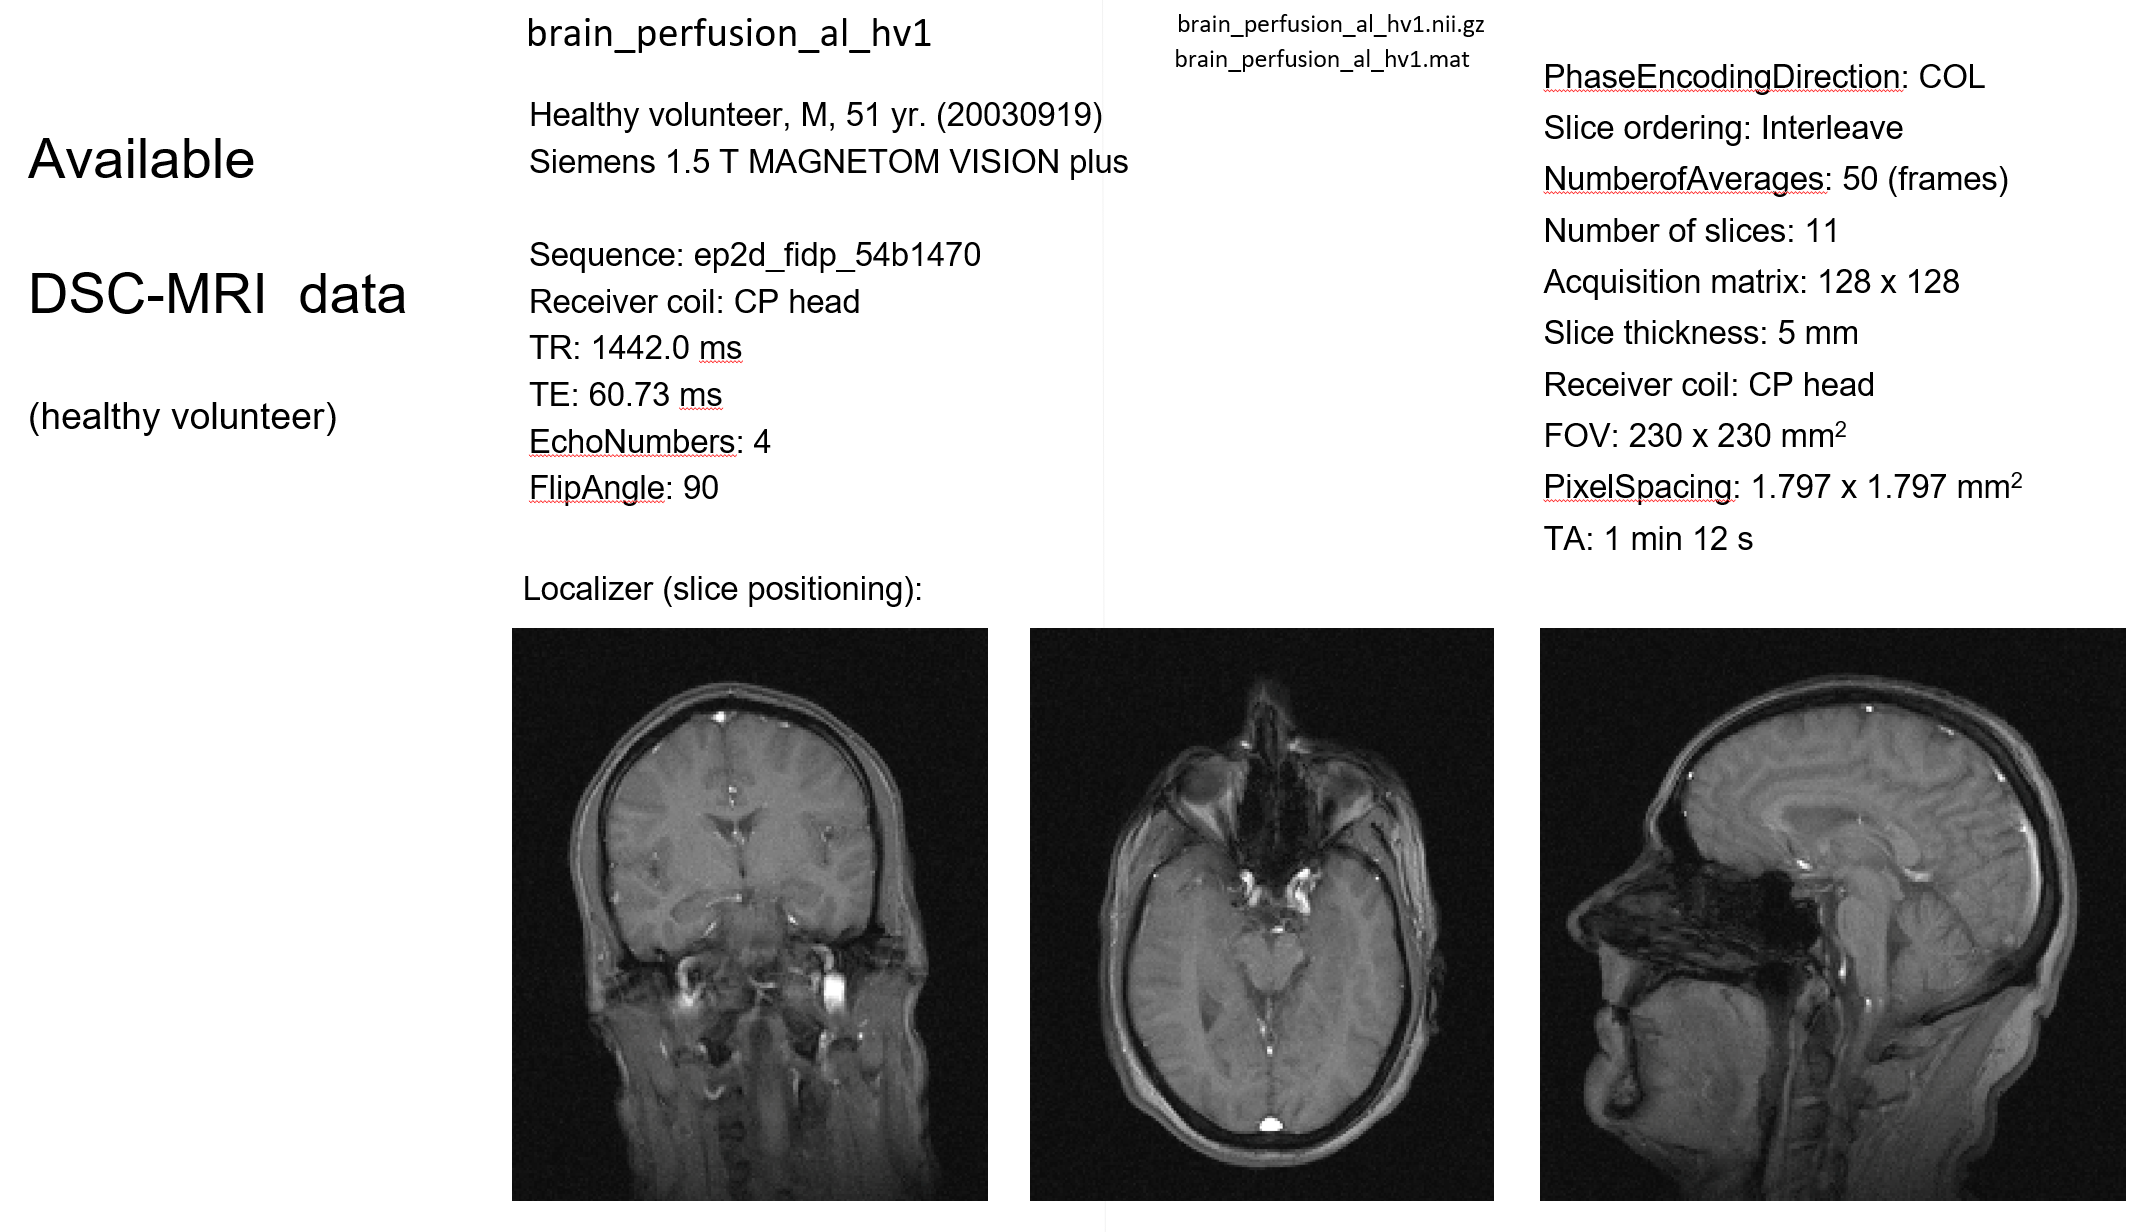

In [149]:
from IPython.display import Image
Image(filename='./assets/brain_perfusion_al_hv1_info.png', width=800)

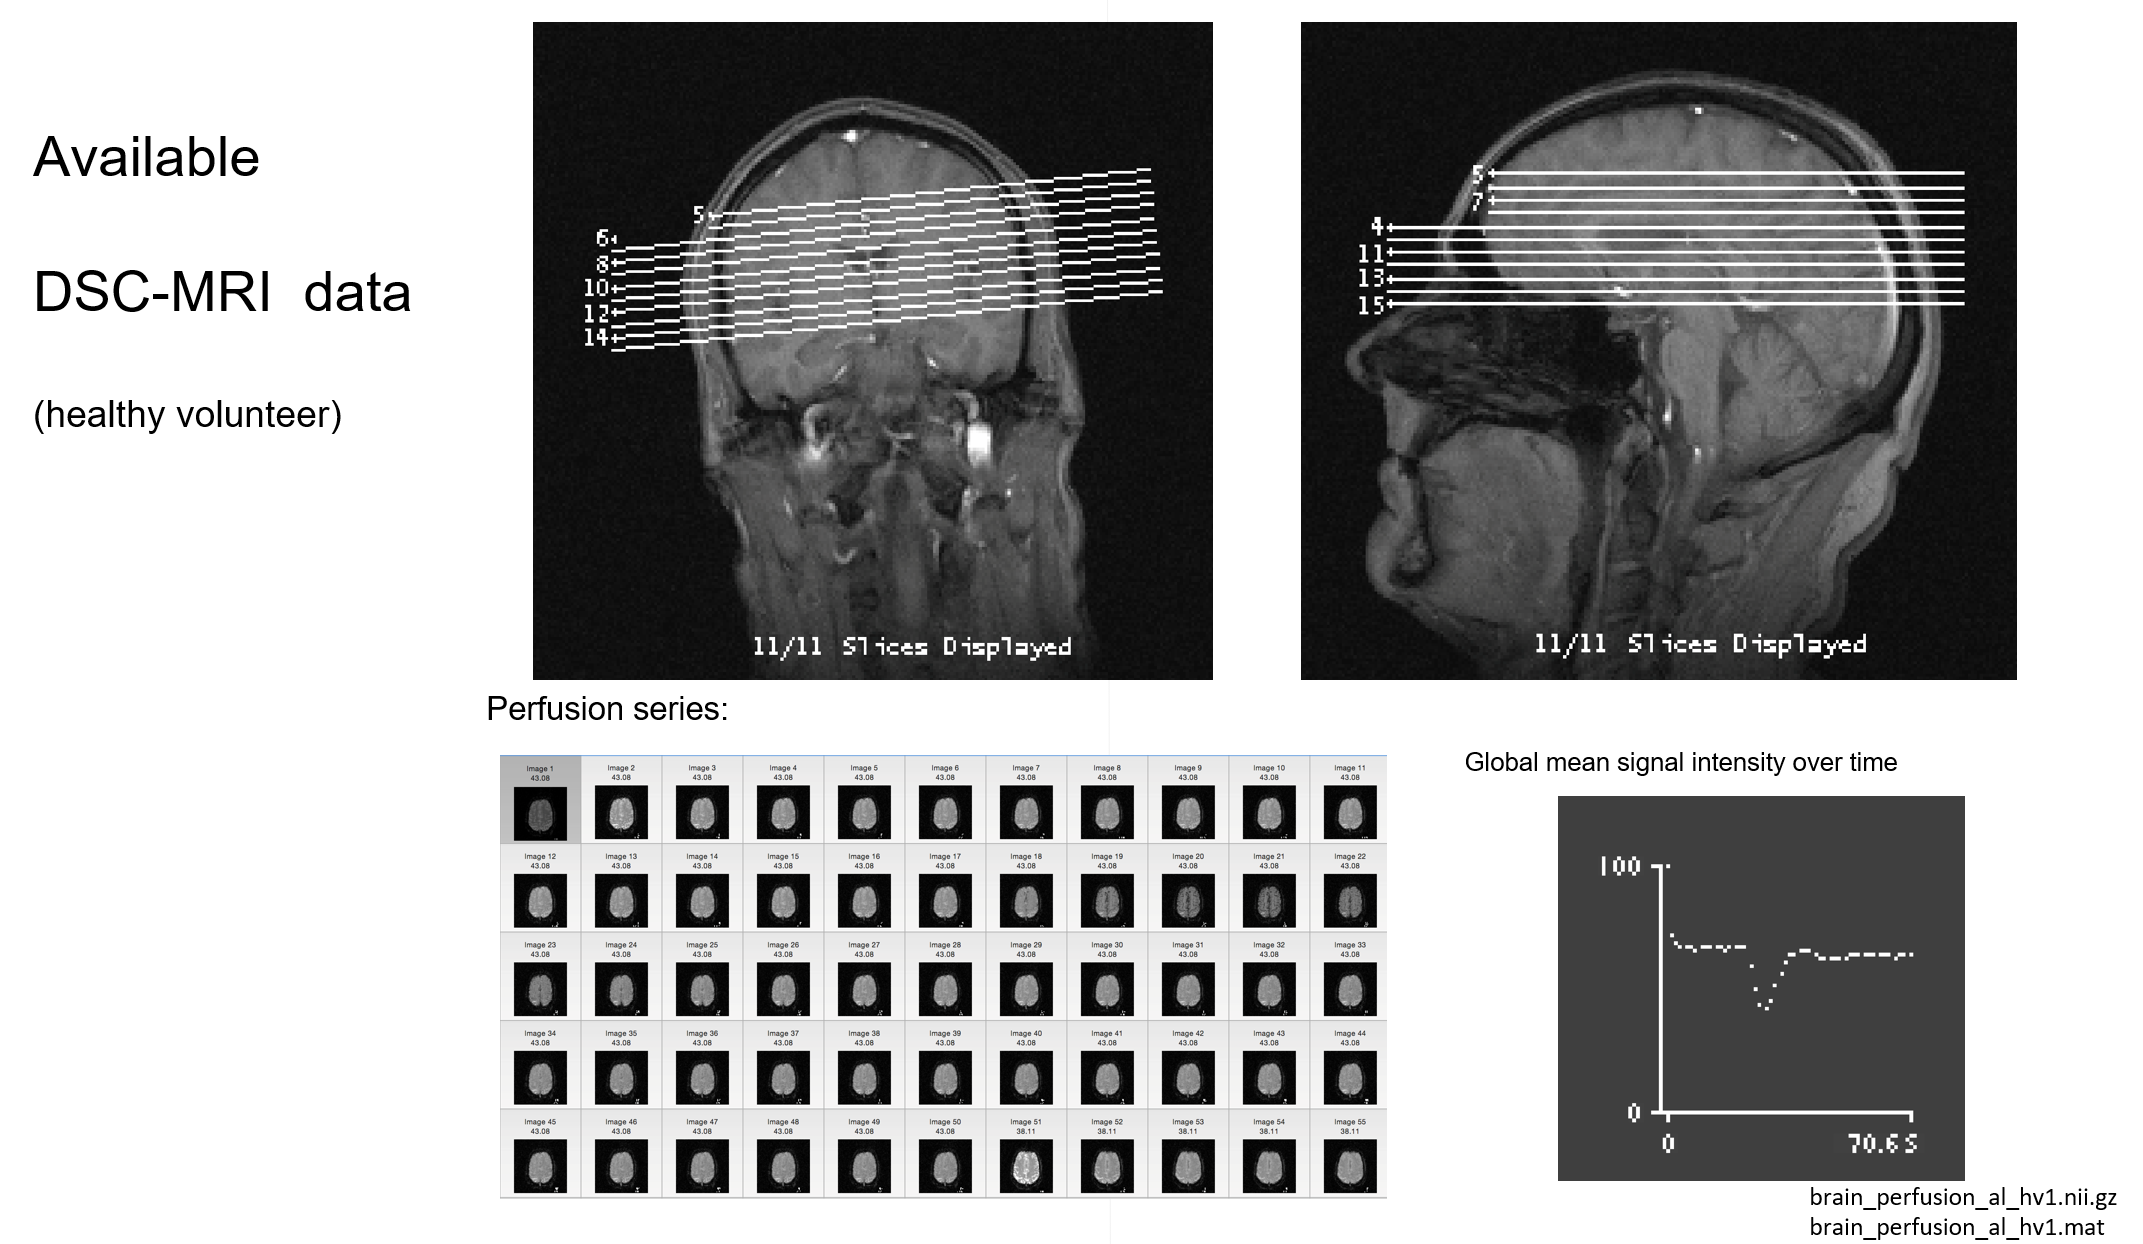

In [150]:
Image(filename='./assets/brain_perfusion_al_hv1_info2.png', width=800)

In [151]:
%matplotlib inline
# This to be able to display figures and graphs within the notebook browser

import os
import pathlib
import glob
import shutil
import warnings
import numpy as np
import pandas as pd
import nibabel as nib
import scipy
import cv2
from nilearn import image
from nilearn import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import skimage
import IPython

home = os.path.expanduser('~')  # home is to make path to local home directory
print('home: %s' % home)

home: C:\Users\arvid


In [152]:
mydata = '../data/mri'
img_name = 'brain_perfusion_al_hv1'
fn = '%s/%s.nii.gz' % (mydata, img_name)

In [153]:
fn

'../data/mri/brain_perfusion_al_hv1.nii.gz'

In [154]:
img = nib.load(fn)

In [155]:
img.get_filename()

'../data/mri/brain_perfusion_al_hv1.nii.gz'

In [156]:
print('shape of image = ', img.header.get_data_shape())
print('units = ', img.header.get_xyzt_units())
print('voxel size = ', img.header.get_zooms())
print('dtype = %s' % img.header.get_data_dtype())
data = img.get_data()
print('data shape', data.shape)
print('min = %d' % data.min())
print('max = %d' % data.max())
print('number of timepoints =', img.shape[-1])

shape of image =  (128, 128, 11, 50)
units =  ('mm', 'sec')
voxel size =  (1.796875, 1.796875, 5.0, 1.442)
dtype = uint16
data shape (128, 128, 11, 50)
min = 0
max = 3257
number of timepoints = 50


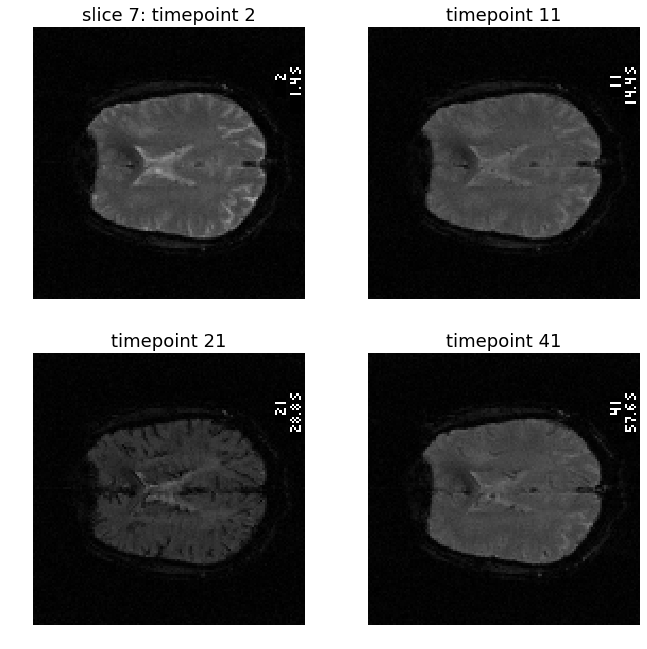

In [157]:
s = 6
t = [1, 10, 20, 40]
fig = plt.figure('Showing the perfusion image', figsize = [11,11])
plt.tight_layout
plt.subplot(2, 2, 1).set_axis_off(), plt.title('slice %d: timepoint %d' % (s+1, t[0]+1), fontsize=18)
plt.imshow(data[:, :, s, t[0]], cmap='gray', origin='lower')  
plt.subplot(2, 2, 2).set_axis_off(), plt.title('timepoint %d' % (t[1]+1), fontsize=18)
plt.imshow(data[:, :, s, t[1]], cmap='gray', origin='lower')
plt.subplot(2, 2, 3).set_axis_off(), plt.title('timepoint %d' % (t[2]+1), fontsize=18)
plt.imshow(data[:, :, s, t[2]], cmap='gray', origin='lower')
plt.subplot(2, 2, 4).set_axis_off(), plt.title('timepoint %d' % (t[3]+1), fontsize=18)
plt.imshow(data[:, :, s, t[3]], cmap='gray', origin='lower')
plt.show()

#fig.savefig('%s/prj/BMED360/results/brain_perfusion_al_hv1_slice7.png' % (home),
#            transparent=False, dpi=300, bbox_inches="tight")

> **CHECK:** 
>
> - *Coordiante systems and affine transforms in medical imaging (e.g. [nibabel](http://nipy.org/nibabel/coordinate_systems.html) / [nilearn](http://nilearn.github.io/auto_examples/04_manipulating_images/plot_affine_transformation.html))*
> - *Converting from DICOM-format (privided by the scanner) to NIFTI-format for processing (e.g. [dcm2nii](https://www.nitrc.org/plugins/mwiki/index.php/dcm2nii:MainPage) og [dcm2niix](https://github.com/rordenlab/dcm2niix))*

In [158]:
aff = img.affine
print('affine header:\n', aff)

affine header:
 [[  -1.73374466    0.            1.31370137  312.37744141]
 [   0.           -1.796875      0.          321.640625  ]
 [   0.47211143    0.            4.82433298 -279.88397217]
 [   0.            0.            0.            1.        ]]


In [159]:
data.flatten().size

9011200

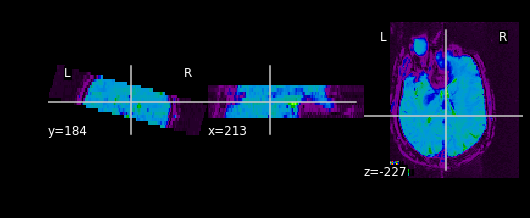

In [160]:
from nilearn.image.image import mean_img
from nilearn import plotting

# Compute the mean EPI: we do the mean along the axis 3, which is time

mean_perf = mean_img(img)

from nilearn.plotting import plot_epi, show
plot_epi(mean_perf)

display = plotting.plot_epi(mean_perf)     
display.close()

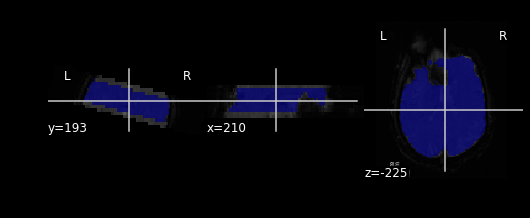

In [161]:
from nilearn.masking import compute_epi_mask
mask_img = compute_epi_mask(img)

# Visualize it as an ROI
from nilearn.plotting import plot_roi
plot_roi(mask_img, mean_perf)

In [162]:
mask_img.shape

(128, 128, 11)

In [163]:
mask_img.get_data().shape

(128, 128, 11)

In [164]:
mask_img.get_data().max()

1

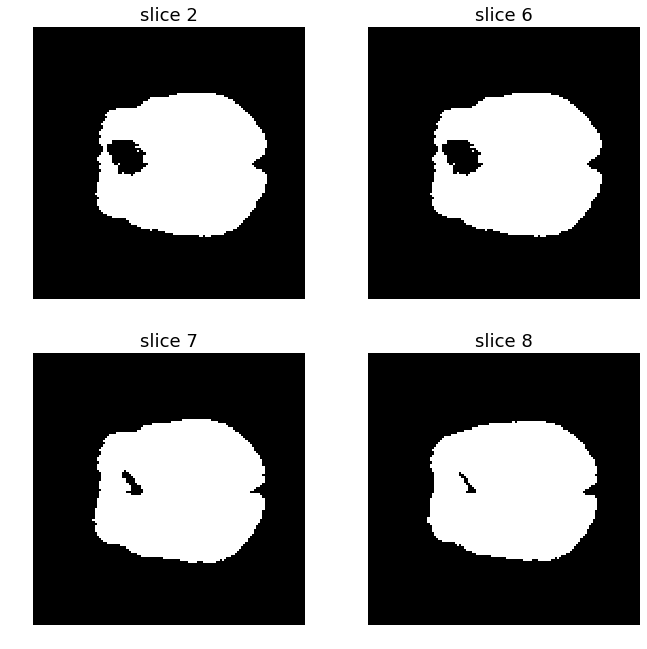

In [165]:
s = [1, 5, 6, 7]
fig = plt.figure('Showing the perfusion image', figsize = [11,11])
plt.tight_layout
plt.subplot(2, 2, 1).set_axis_off(), plt.title('slice %d' % (s[0]+1), fontsize=18)
plt.imshow(mask_img.get_data()[:, :, s[1]], cmap='gray', origin='lower')  
plt.subplot(2, 2, 2).set_axis_off(), plt.title('slice %d' % (s[1]+1), fontsize=18)
plt.imshow(mask_img.get_data()[:, :, s[1]], cmap='gray', origin='lower')
plt.subplot(2, 2, 3).set_axis_off(), plt.title('slice %d' % (s[2]+1), fontsize=18)
plt.imshow(mask_img.get_data()[:, :, s[2]], cmap='gray', origin='lower')
plt.subplot(2, 2, 4).set_axis_off(), plt.title('slice %d' % (s[3]+1), fontsize=18)
plt.imshow(mask_img.get_data()[:, :, s[3]], cmap='gray', origin='lower')
plt.show()


In [166]:
msk = mask_img.get_data()
mm = np.where(msk[:,:,:] == 1)
print('Number of voxels in the mask:', len(mm[0]))
print('i', mm[0][:5])
print('j', mm[1][:5])
print('k', mm[2][:5])

Number of voxels in the mask: 28714
i [28 28 28 28 28]
j [73 74 75 76 77]
k [2 2 2 2 2]


In [167]:
masked_data.shape

(50, 28714)

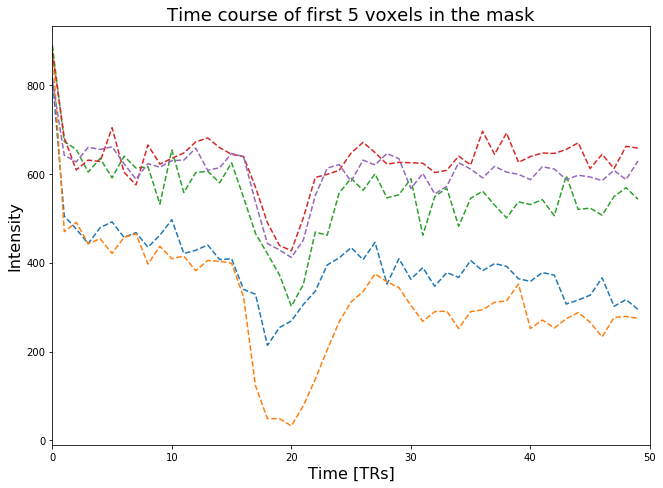

In [168]:
from nilearn.masking import apply_mask
masked_data = apply_mask(img, mask_img)

# masked_data shape is (timepoints, voxels). We can plot the first 50
# timepoints from two voxels

nv = 5
# And now plot a few of these
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(masked_data[:50, :nv],'--')
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, 50)
plt.title('Time course of first %d voxels in the mask' % (nv), fontsize=18)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

plt.show()

### K-means clustering of time courses

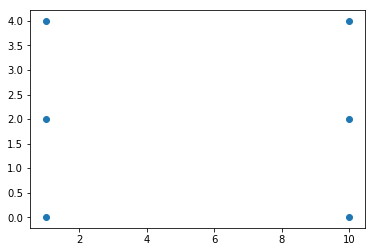

In [169]:
from sklearn.cluster import KMeans

X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

plt.scatter(X[:,0], X[:,1])
plt.show()

In [170]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print('kmeans.labels_:', kmeans.labels_)
print('X.shape:', X.shape)
print('kmeans.cluster_centers_:\n', kmeans.cluster_centers_)
print('kmeans.predict([[0, 0], [12, 3]]:', kmeans.predict([[0, 0], [12, 3]]))

kmeans.labels_: [1 1 1 0 0 0]
X.shape: (6, 2)
kmeans.cluster_centers_:
 [[10.  2.]
 [ 1.  2.]]
kmeans.predict([[0, 0], [12, 3]]: [1 0]


#### Clustering the 4D perfusion data within the mask

In [192]:
X = masked_data.T   # n x p data matrix, n=samples, p = feature vector dimension
K = 16  # Number of clusters
print(X.shape)
kmeans_model = KMeans(n_clusters=K, random_state=42)
print(kmeans_model)

(28714, 50)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)


In [193]:
kmeans_fit = kmeans_model.fit(X)

In [194]:
print(kmeans_fit.labels_)
print('First kmeans.cluster_center (time course):\n', kmeans_fit.cluster_centers_[0,:])

[11  9 15 ...  8 11  3]
First kmeans.cluster_center (time course):
 [926.2837  684.9557  657.96454 651.144   647.9663  648.6002  646.428
 647.24457 647.5542  646.14246 646.9941  647.8104  646.8677  646.80096
 649.1016  647.30457 608.6848  490.60635 380.8617  334.70786 357.84668
 429.91467 513.1148  576.5149  614.47424 635.0157  639.9278  642.3333
 636.19366 625.2753  615.615   603.4954  601.0633  600.22485 605.5653
 610.234   615.595   619.3842  618.82495 619.8325  618.5245  616.983
 618.99005 617.1745  615.1676  617.13544 615.4453  616.52814 617.5797
 618.06903]


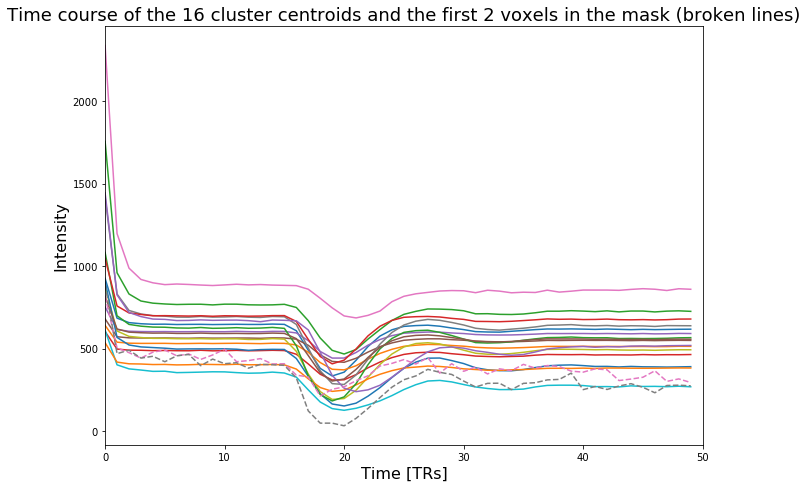

In [195]:
nv = 2

plt.figure(figsize=(10, 7))

plt.plot(kmeans_fit.cluster_centers_.T)
plt.plot(masked_data[:50, :nv], '--')
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, 50)
plt.title('Time course of the %d cluster centroids and the first %d voxels in the mask (broken lines)' % (K, nv), fontsize=18)

plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

plt.show()

In [196]:
kmeans_segm = 0 * mask_img.get_data().copy()
print(kmeans_segm.shape)

for v in range(len(mm[0])):
    kmeans_segm[mm[0][v], mm[1][v], mm[2][v]] = kmeans_fit.labels_[v]


(128, 128, 11)


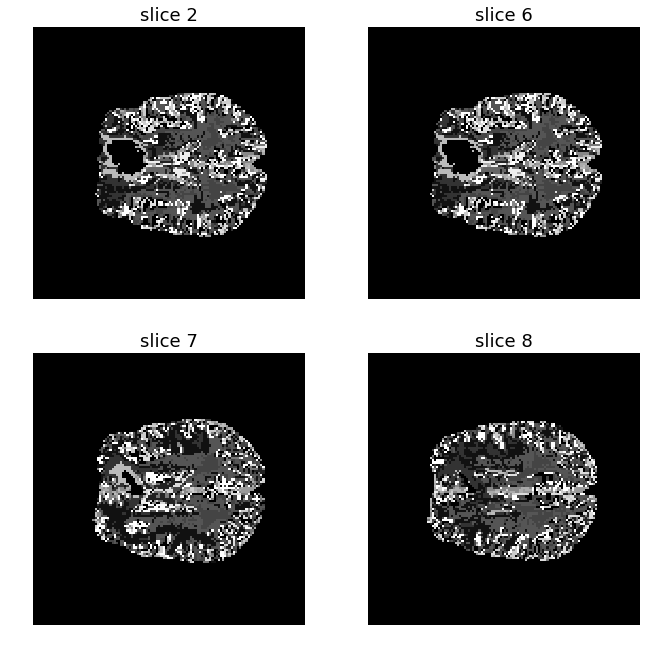

In [197]:
s = [1, 5, 6, 7]
fig = plt.figure('Showing the Kmeans clustered perfusion image', figsize = [11,11])
plt.tight_layout
plt.subplot(2, 2, 1).set_axis_off(), plt.title('slice %d' % (s[0]+1), fontsize=18)
plt.imshow(kmeans_segm[:, :, s[1]], cmap='gray', origin='lower')  
plt.subplot(2, 2, 2).set_axis_off(), plt.title('slice %d' % (s[1]+1), fontsize=18)
plt.imshow(kmeans_segm[:, :, s[1]], cmap='gray', origin='lower')
plt.subplot(2, 2, 3).set_axis_off(), plt.title('slice %d' % (s[2]+1), fontsize=18)
plt.imshow(kmeans_segm[:, :, s[2]], cmap='gray', origin='lower')
plt.subplot(2, 2, 4).set_axis_off(), plt.title('slice %d' % (s[3]+1), fontsize=18)
plt.imshow(kmeans_segm[:, :, s[3]], cmap='gray', origin='lower')
plt.show()

In [198]:
data_smooth = data.copy()

for v in range(len(mm[0])):
    data_smooth[mm[0][v], mm[1][v], mm[2][v]] = kmeans_fit.cluster_centers_[kmeans_fit.labels_[v],:]

data_smooth.shape

(128, 128, 11, 50)

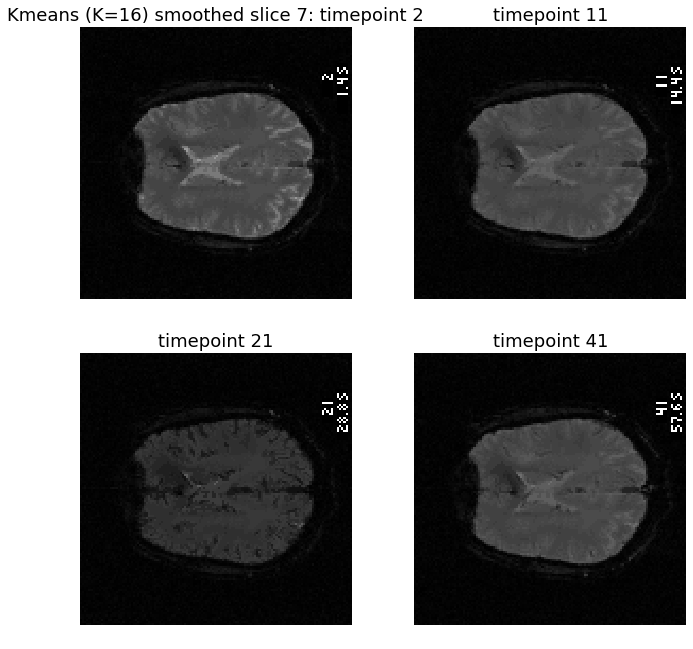

In [199]:
s = 6
t = [1, 10, 20, 40]
fig = plt.figure('Showing the Kmeans-smoothed perfusion image', figsize = [11,11])
plt.tight_layout
plt.subplot(2, 2, 1).set_axis_off(), plt.title('Kmeans (K=%d) smoothed slice %d: timepoint %d' % (K, s+1, t[0]+1), fontsize=18)
plt.imshow(data_smooth[:, :, s, t[0]], cmap='gray', origin='lower')  
plt.subplot(2, 2, 2).set_axis_off(), plt.title('timepoint %d' % (t[1]+1), fontsize=18)
plt.imshow(data_smooth[:, :, s, t[1]], cmap='gray', origin='lower')
plt.subplot(2, 2, 3).set_axis_off(), plt.title('timepoint %d' % (t[2]+1), fontsize=18)
plt.imshow(data_smooth[:, :, s, t[2]], cmap='gray', origin='lower')
plt.subplot(2, 2, 4).set_axis_off(), plt.title('timepoint %d' % (t[3]+1), fontsize=18)
plt.imshow(data_smooth[:, :, s, t[3]], cmap='gray', origin='lower')
plt.show()

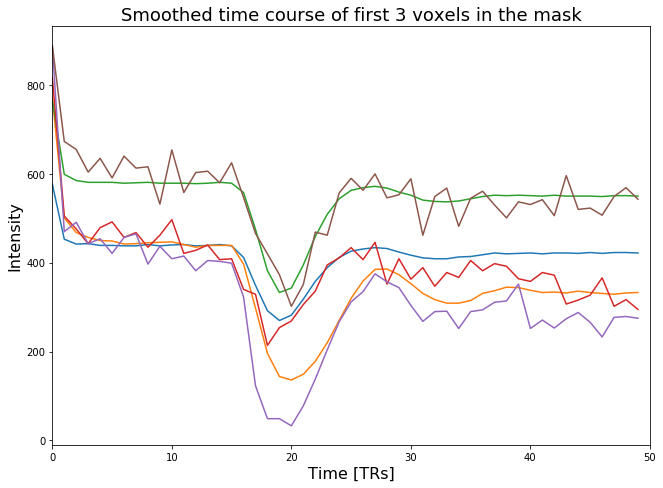

In [200]:
#mask_img_smooth = compute_epi_mask(img_smooth)
masked_data_smooth = apply_mask(img_smooth, mask_img)

# masked_data shape is (timepoints, voxels). We can plot the first 50
# timepoints from two voxels

nv = 3
# And now plot a few of these
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(masked_data_smooth[:50, :nv],'-')
plt.plot(masked_data[:50, :nv],'-')
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, 50)
plt.title('Smoothed time course of first %d voxels in the mask' % (nv), fontsize=18)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

plt.show()

In [201]:
# Make a new smoothed nifti image and save it to disk in ~/prj/BMED360/data

mylocaldata = '%s/prj/BMED360/data' % (home)
affine = img.affine

img_orig = nib.Nifti1Image(data, affine)
img_smooth = nib.Nifti1Image(data_smooth, affine)

img_orig_name = 'brain_perfusion_al_hv1'
img_smooth_name = 'brain_perfusion_al_hv1_smoothed'
fn_orig = '%s/%s.nii.gz' % (mylocaldata, img_orig_name)
fn_smooth = '%s/%s.nii.gz' % (mylocaldata, img_smooth_name)

nib.save(img_orig, fn_orig)
nib.save(img_smooth, fn_smooth)